# Checkpoint 1: EDA

This reports explain our work for checkpoint 1, which can be divided into data preprocessing and EDA.

## Data Preprocessing

The original dataset is from [Kaggle](https://www.kaggle.com/datasets/des137/us-births-2018). It contains the information about all of the child birth in the United States in the year of 2018. It is a large dataset with 3.8 million observations and 55 features. For better statistical analysis on this dataset for our study, we clean the data, conduct feature engineering, and subsample the observations and features.

In [1]:
import pandas as pd

In [2]:
birth = pd.read_csv('US_births(2018).csv')

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_8936\1232191482.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  birth = pd.read_csv('US_births(2018).csv')


In [3]:
birth.shape

(3801534, 55)

### Data Cleaning

In [4]:
clean_birth = birth.dropna()

# remove missing values in the response/outcome variable
clean_birth = clean_birth[clean_birth['DBWT'] != 9999] 

# remove missing values in the features
clean_birth = clean_birth[
    (clean_birth['PRECARE'] != 99) & 
    (clean_birth['CIG_0'] != 99) & 
    (clean_birth['BMI'] != 99.9) & 
    (clean_birth['PREVIS'] != 99) & 
    (clean_birth['MRAVE6'] != 9) & 
    (clean_birth['PAY_REC'] != 9) &
    (clean_birth['FRACE6'] != 9) &
    (clean_birth['MEDUC'] != 9) & 
    (clean_birth['FEDUC'] != 9) & 
    (clean_birth['NO_RISKS'] != 9) & 
    (clean_birth['ATTEND'] != 9) &
    (clean_birth['BFACIL'] != 9) &
    (clean_birth['FAGECOMB'] != 99) &
    (clean_birth['RF_CESAR'] != 'U') &
    (clean_birth['LD_INDL'] != 'U') &
    (clean_birth['MBSTATE_REC'] != 3) &
    (clean_birth['M_Ht_In'] != 99) &
    (clean_birth['NO_INFEC'] != 9) &
    (clean_birth['NO_MMORB'] != 9) &
    (clean_birth['PRIORLIVE'] != 99) &
    (clean_birth['PRIORTERM'] != 99) &
    (clean_birth['RDMETH_REC'] != 9) &
    (clean_birth['DLMP_YY'] != 9999) &
    (clean_birth['DLMP_MM'] != 99) &
    (clean_birth['PWgt_R'] != 999) &
    (clean_birth['WTGAIN'] != 99) &
    (clean_birth['ILLB_R'] != 909)
] 

In [5]:
clean_birth.shape

(2783789, 55)

In this step, we remove any observation with missing values in important features. Although this may make our subsequent statistical analysis biased, we believe that the remaining data is sufficient for us to give confident conclusion. Interpolating these missing values might be a strategy worth to try in future studies.

### Feature engineering

In [6]:
# estimate pregnancy length
clean_birth['PREG_LEN'] = 12*(2018 - clean_birth['DLMP_YY']) + (clean_birth['DOB_MM'] - clean_birth['DLMP_MM']) 

# recode PRECARE
clean_birth['PRECARE'][(clean_birth['PRECARE'] < 4) & (clean_birth['PRECARE'] > 0)] = 1 
clean_birth['PRECARE'][(clean_birth['PRECARE'] < 7) & (clean_birth['PRECARE'] > 3)] = 2
clean_birth['PRECARE'][(clean_birth['PRECARE'] > 6)] = 3

# compute percentage weight gain
clean_birth['WTGAIN_PER'] = clean_birth['WTGAIN'] / clean_birth['PWgt_R'] 

# binarize CIG_0
clean_birth['CIG'] = clean_birth['CIG_0'] > 0 

# binarize PRIORDEAD
clean_birth['PRIORDEAD'] = clean_birth['PRIORDEAD'] > 0

# binarize PRIORTERM
clean_birth['PRIORTERM'] = clean_birth['PRIORTERM'] > 0

# binarize PRIORLIVE
clean_birth['PRIORLIVE'] = clean_birth['PRIORLIVE'] > 0

# compute first time live birth
clean_birth['FIRST_BIRTH'] = clean_birth['ILLB_R'] == 888

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_8936\3934213008.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_birth['PRECARE'][(clean_birth['PRECARE'] < 4) & (clean_birth['PRECARE'] > 0)] = 1
C:\Users\Wenhao\AppData\Local\Temp\ipykernel_8936\3934213008.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_birth['PRECARE'][(clean_birth['PRECARE'] < 7) & (clean_birth['PRECARE'] > 3)] = 2
C:\Users\Wenhao\AppData\Local\Temp\ipykernel_8936\3934213008.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In this step, we recode some features to make them more suitable for analysis. For example, we add feature `PREG_LEN` to directly calculate the pregnancy length instead of having to look for the difference between the last normal menses month `DLMP_MM`  and the birth month `DOB_MM` in the original data.

We recode the feature `PRECARE` and rate it according to the number of months of prenatal care. Simplifying this feature can make our analysis and calculation easier.

We also binarize the number of cigarettes before birth as 0 or 1 in `CIG`. Any mother who had smoked before pregnacy, no matter how many cigarettes they had, will be classified as 1, while the rest are classified as 0. Binarizing this data will help us answer our causal inference question - does smoking cause lower baby birth weights. But we do realize that we are assuming a uniform treatment by binarization, which needs to be considered in later analysis.

We also binarize `PRIORDEAD`, `PRIORLIVE`, and `PRIORTERM` features, so any prior deaths, livings, or other terminations of babies were either categorized as 1 (True) and 0 (False).

In [7]:
# drop columns where >99% entries are the same
clean_birth = clean_birth.drop(['DOB_YY', 'IMP_SEX', 'IP_GON', 'MAGE_IMPFLG', 'MAR_IMP', 'MM_AICU', 'MTRAN'], axis=1)

# drop redundant columns due to feature engineering
clean_birth = clean_birth.drop(['WTGAIN', 'PWgt_R', 'DWgt_R', 'DOB_MM', 
                                   'DOB_WK', 'DOB_TT', 'DOB_MM', 'DLMP_YY',
                                   'DLMP_MM', 'PAY', 'MHISPX', 'MRACE15',
                                   'MRACE31', 'MRACEIMP', 'FHISPX', 'FRACE15',
                                   'FRACE31', 'RF_CESARN', 'ILOP_R', 'ILP_R', 'ILLB_R','CIG_0'], axis=1)

In [8]:
clean_birth.shape

(2783789, 31)

We drop columns where over 99% entries have the same values because we think they can not provide much insights to our analysis. We also dropped the redundant columns due to feature engineering.

### Subsampling

Since the above modified data still had 2783789 rows which might be too large for our analysis, we decided to randomly select 10000 of them and saved this new data as `sub_clean_birth`.

In [9]:
n = 10000
sub_clean_birth = clean_birth.sample(n, random_state=102)

In [10]:
sub_clean_birth

,ATTEND,BFACIL,BMI,DBWT,DMAR,FAGECOMB,FEDUC,FRACE6,LD_INDL,MAGER,...,PRIORLIVE,PRIORTERM,RDMETH_REC,RESTATUS,RF_CESAR,SEX,PREG_LEN,WTGAIN_PER,CIG,FIRST_BIRTH
2780164,1,1,31.4,3670,1,29,6,1,N,32,...,False,False,1,2,N,M,9,0.000000,False,True
1306496,2,1,27.6,3494,1,34,4,1,Y,33,...,True,False,1,1,N,F,9,0.120482,False,False
3027006,1,1,27.1,3374,2,43,2,1,N,29,...,True,True,1,1,N,M,10,0.061350,True,False
903600,1,1,26.8,3520,1,30,3,1,Y,28,...,False,True,1,1,N,M,9,0.301282,False,True
2813944,1,1,21.3,3140,1,30,5,1,N,30,...,False,False,1,3,N,M,9,0.208333,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541267,1,1,35.9,3062,1,30,4,1,Y,30,...,True,False,1,1,N,M,9,0.173684,False,False
1786746,1,1,22.5,3855,1,30,3,1,Y,23,...,False,False,3,1,N,M,9,0.263514,False,True
1928116,1,1,20.4,2710,1,39,2,1,Y,32,...,True,True,1,2,N,M,9,0.388889,True,False
60244,1,1,24.4,3118,1,35,2,1,Y,34,...,False,False,3,2,N,M,10,0.147887,False,True


In [11]:
sub_clean_birth.to_csv('subsampled_clean_data.csv', index=False)

## EDA

After acquiring a dataset for analysis, we conduct the Exploratory Data Analysis (EDA) procedure to learn insights about answering our research questions from our data. 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

birth = sub_clean_birth

### Quantitative Variables

#### Birth Weight – Detail in Grams (DBWT)

Text(0.5, 1.0, 'Birth Weight-Detail in Grams')

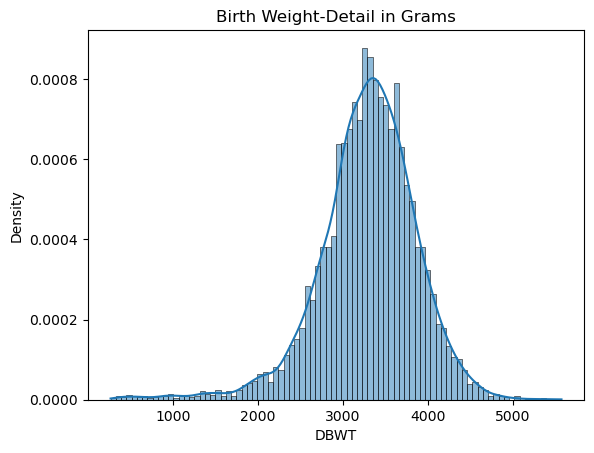

In [13]:
sns.histplot(birth['DBWT'], stat = 'density', kde = True)
plt.title("Birth Weight-Detail in Grams")

In [14]:
#Mean
np.mean(birth['DBWT'])

3291.9113

In [15]:
#SD
np.std(birth['DBWT'])

578.2338821206432

In [16]:
#min and max
np.min(birth['DBWT']), np.max(birth['DBWT'])

(269, 5570)

From the histogram above, we see that the birth weight is rougly normally distributed with mean = 3292 and standard deviation = 578. We can see that it is slightly skewed to the left, with minimum weight at 269; this is an interesting trend that we can follow up in order to answer our first research question ("Does smoking cause lower birth weights?"). Our second research question ("Predicting a baby's birth weight from Mother’s Single Years of Age and Number of Prenatal Visits, comparing GLMs to nonparametric methods.") is attempting to predict birth weight, so we can use this histogram to help us perform model checking.

## Mother’s Single Years of Age (MAGER)

Text(0.5, 1.0, "Mother's Single Years of Age")

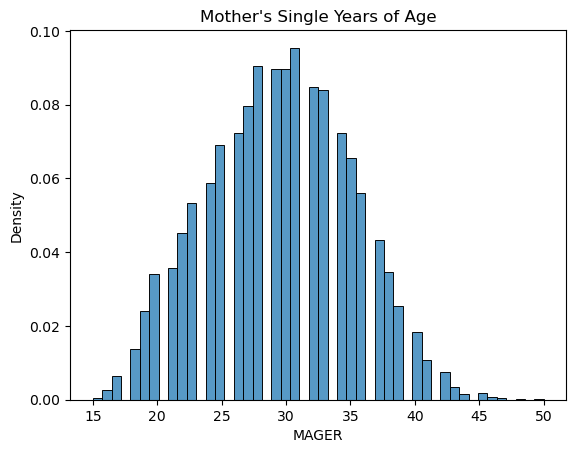

In [17]:
sns.histplot(birth['MAGER'], stat = 'density')
plt.title("Mother's Single Years of Age")

In [18]:
#Mean
np.mean(birth['MAGER'])

29.5224

In [19]:
#SD
np.std(birth['MAGER'])

5.578216403116681

In [20]:
#min and max
np.min(birth['MAGER']), np.max(birth['MAGER'])

(15, 50)

From the histogram above, we see that the mother's age is rougly normally distributed as well with mean around 19.5 and standard deviation around 5.6. We can see that it is slightly skewed to the right, with maximum age at 50; this is an interesting trend that we can follow up for our second research question ("Predicting a baby's birth weight from Mother’s Single Years of Age and Number of Prenatal Visits, comparing GLMs to nonparametric methods."). We can use this to help us answer if older mother is likely to have babies with lighter birth weights.

## Number of Prenatal Visits - PREVIS

Text(0.5, 1.0, 'Number of Prenatal Visits')

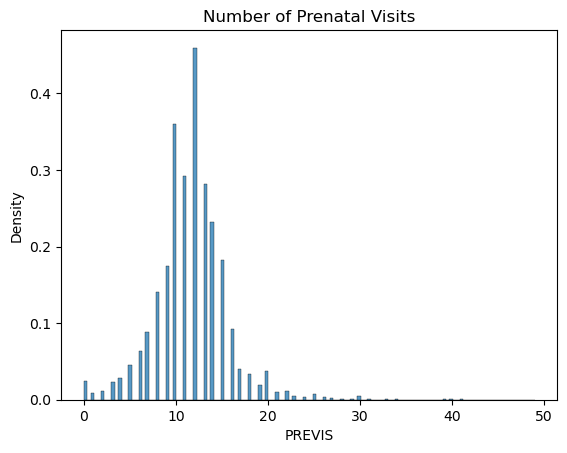

In [21]:
sns.histplot(birth['PREVIS'], stat = 'density')
plt.title("Number of Prenatal Visits")

In [22]:
#Mean
np.mean(birth['PREVIS'])

11.647

In [23]:
#SD
np.std(birth['PREVIS'])

3.957093756786665

In [24]:
#min and max
np.min(birth['PREVIS']), np.max(birth['PREVIS'])

(0, 49)

From the histogram above, we see that the number of prenatal visits is rougly normally distributed with mean around 11.65 and standard deviation around 3.96. We can see that there is an outlier in the data: one family has 49 prenatal visits. This is an interesting observation for our research question. We can use this to help us answer if more prenatal visits is likely to increase a baby's birth weights.

# Categorical Variables

## Smoking Before Pregnancy - CIG

As we have done in `preprocessing.ipynb`, the number of cigarettes before pregnancy (CIG-0) is binarized into `True` (having greater than or equal to 1 cigarette) and `False` (not having any cigarettes). 

Text(0.5, 1.0, 'Smoking Before Pregnancy')

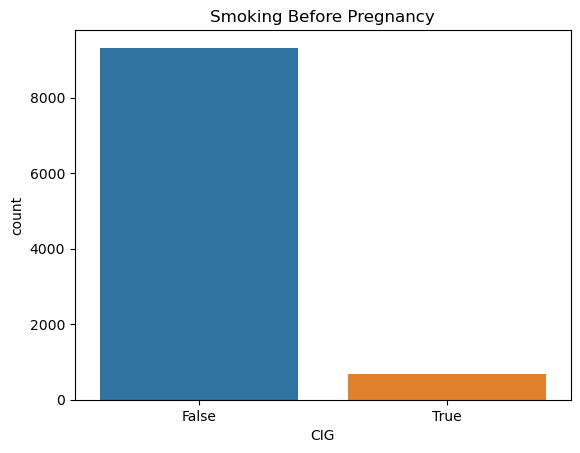

In [25]:
sns.countplot(x = birth['CIG'])
plt.title("Smoking Before Pregnancy")

In [26]:
#Number of Smokers
np.sum(birth['CIG'] == 1)

682

In [27]:
#Number of Non-smokers
np.sum(birth['CIG'] == 0)

9318

In [28]:
#Percentage of each category
freq = birth['CIG'].value_counts()
perc = freq/sum(freq)
perc

False    0.9318
True     0.0682
Name: CIG, dtype: float64

From the Bar Chart above, we can see that 93.18% of mother don't smoke before pregnancy, while 6.82% do smoke. The significant difference between number of smokers and non-smokers is something we need to take into account when analyzing the effect of smoking on baby weights. This data will help us addresss our first research question ("Does smoking cause lower birth weights?").

## First Birth - FIRST_BIRTH

As we have done in `preprocessing.ipynb`, the time interval since last other pregnancy (ILLB_R) is binarized into `True` (the babt is the first child) and `False` (not being the first child).

Text(0.5, 1.0, 'First Birth Child')

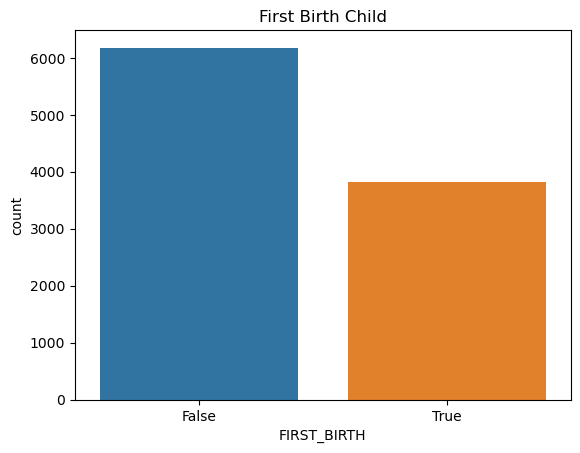

In [29]:
sns.countplot(x = birth['FIRST_BIRTH'])
plt.title("First Birth Child")

In [30]:
#Number of First Birth
np.sum(birth['FIRST_BIRTH'] == 1)

3823

In [31]:
#Number of None First Birth
np.sum(birth['FIRST_BIRTH'] == 0)

6177

In [32]:
#Percentage of each category
freq = birth['FIRST_BIRTH'].value_counts()
perc = freq/sum(freq)
perc

False    0.6177
True     0.3823
Name: FIRST_BIRTH, dtype: float64

From the Bar Chart above, we can see that there are more families giving birth to their non-first child than their first child: 61.77% of family has already have one or more than one babies, while 38.23% gives birth to their first child. This helps us investigate the effect of being the first-born on birth weights as it could be a potential useful feature to predict baby weights.

## Sex of Infant - SEX

Text(0.5, 1.0, "Babies' Biological Gender")

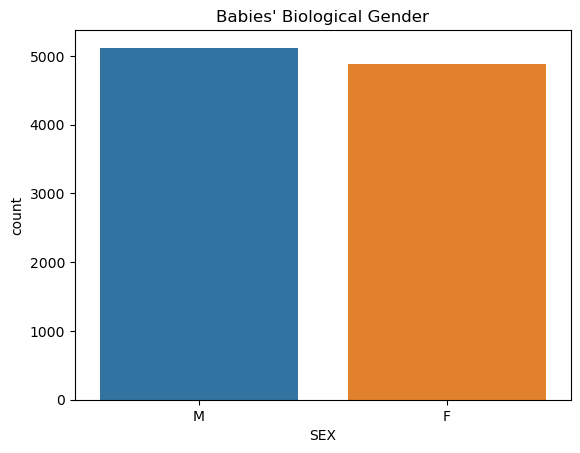

In [33]:
sns.countplot(x = birth['SEX'])
plt.title("Babies' Biological Gender")

In [34]:
#Number of Males
np.sum(birth['SEX'] == 'M')

5119

In [35]:
#Number of Females
np.sum(birth['SEX'] == 'F')

4881

In [36]:
#Percentage of each category
freq = birth['SEX'].value_counts()
perc = freq/sum(freq)
perc

M    0.5119
F    0.4881
Name: SEX, dtype: float64

From the bar chat above, we can see that there isn't a big difference between the number of female babies and the number of male babies, with 51.19% of them as males and 48.81% of them being females. The biological sex of a baby is a useful feature that may influece a baby's birth weight.